# Sujet 6 : Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


Maintenant nous allons telecharger nos données en se servant du lien de téléchargement

In [2]:
data_url= "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"

maintenant nous importons nos données localement dans Jupyter 

In [3]:
data_file = "Subject6_smoking.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url,data_file)

In [6]:
raw_data = pd.read_csv(data_file)

## Mission 1

Nous effectuons le calcule des personnes qui ne fumme pas et sont en vie; qui fument et sont en vie; qui ne fument pas et sont mort; qui fument et sont mort 

In [47]:
sum_alive_NotSmoking = raw_data[(raw_data["Smoker"] == "No") & (raw_data["Status"] == "Alive")].shape[0]
sum_alive_Smoking = raw_data[(raw_data["Smoker"] == "Yes") & (raw_data["Status"] == "Alive")].shape[0]
sum_death_NotSmoking = raw_data[(raw_data["Smoker"] == "No") & (raw_data["Status"] == "Dead")].shape[0]
sum_death_Smoking = raw_data[(raw_data["Smoker"] == "Yes") & (raw_data["Status"] == "Dead")].shape[0]

Maintenant on presente le tableau demandé

### Calcule du taux de mortalité

In [58]:
#Pour les femmes qui fumment 
taux_fume = (sum_death_Smoking / (sum_death_Smoking+sum_alive_Smoking))*100
taux_fume = round(taux_fume, 2)

In [59]:
#Pour les femmes qui ne fument pas 
taux_fume_pas = (sum_death_NotSmoking / (sum_death_NotSmoking+sum_alive_NotSmoking))*100
taux_fume_pas = round(taux_fume_pas, 2)

### Tableau de mortalité

In [60]:
données_tab1 = {"En vie":[sum_alive_Smoking , sum_alive_NotSmoking], "Mort": [sum_death_Smoking, sum_death_NotSmoking], "Taux mortalité en %": [taux_fume, taux_fume_pas]}
tab1 = pd.DataFrame(données_tab1)
tab1.index = ["fume", "Ne fume pas"]

### Affichage du premier tableau 

In [61]:
tab1

En vie  Mort  Taux mortalité en %
fume            443   139                23.88
Ne fume pas     502   230                31.42

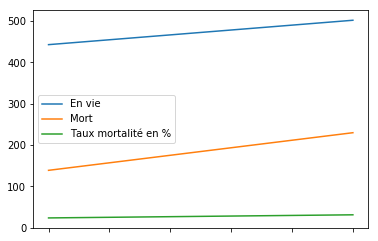

In [62]:
tab1.plot()

## Mission 2

Nous commençons d'abord par calculer les nombres de personnes par tranche d'age. 

#### Tranche d'age entre 18 à 34 ans

In [83]:
#Tranche d'age allant de 18 à 34 ans et fument
age_18_34f = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "Yes")].shape[0] # f designe fume

#Tranche d'age allant de 18 à 34 ans, fument et vivent
age_18_34fv = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Alive")].shape[0] # fv designe fume et vie 

#Tranche d'age allant de 18 à 34 ans, fument et mort
age_18_34fm = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Dead")].shape[0] # fm designe fume et mort 

#Tranche d'age allant de 18 à 34 ans et ne fument pas
age_18_34fp = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "No")].shape[0] # fp désigne ne fume pas

#Tranche d'age allant de 18 à 34 ans, fument pas et vivent
age_18_34fpv = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Alive")].shape[0] # fpv designe fume pas et vie 

#Tranche d'age allant de 18 à 34 ans, fument pas et mort
age_18_34fpm = raw_data[(raw_data["Age"] <= 34) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Dead")].shape[0] # fpm designe fume pas et mort 

#Tranche d'age allant de 18 à 34 ans et sont en vie
age_18_34v = raw_data[(raw_data["Age"] <= 34) & (raw_data["Status"] == "Alive")].shape[0] # v désigne vie

#Tranche d'age allant de 18 à 34 ans et sont mort
age_18_34m = raw_data[(raw_data["Age"] <= 34) & (raw_data["Status"] == "Dead")].shape[0] # m désigne mort 

#### Tranche d'age allant de 34 à 54 ans (34 exclut mais 54 inclut) 

In [84]:
#Tranche d'age allant de 34 à 54 ans et fument
age_34_54f = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "Yes")].shape[0] # f designe fume

#Tranche d'age allant de 34 à 54 ans, fument et vivent
age_34_54fv = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Alive")].shape[0] # fv designe fume et vie 

#Tranche d'age allant de 34 à 54 ans, fument et mort
age_34_54fm = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Dead")].shape[0] # fm designe fume et mort 

#Tranche d'age allant de 34 à 54 ans et ne fument pas
age_34_54fp = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "No")].shape[0] # fp désigne ne fume pas

#Tranche d'age allant de 34 à 54 ans, fument pas et vivent
age_34_54fpv = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Alive")].shape[0] # fpv designe fume pas et vie 

#Tranche d'age allant de 34 à 54 ans, fument pas et mort
age_34_54fpm = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Dead")].shape[0] # fpm designe fume pas et mort 

#Tranche d'age allant de 34 à 54 ans et sont en vie
age_34_54v = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Status"] == "Alive")].shape[0] # v désigne vie

#Tranche d'age allant de 34 à 54 ans et sont mort
age_34_54m = raw_data[(raw_data["Age"] > 34) & (raw_data["Age"] <= 54) & (raw_data["Status"] == "Dead")].shape[0] # m désigne mort

#### Tranche d'age allant de 54 à 64 ans (54 exclut mais 64 inclut) 

In [85]:
#Tranche d'age allant de 54 à 64 ans et fument
age_54_64f = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "Yes")].shape[0] # f designe fume

#Tranche d'age allant de 54 à 64 ans, fument et vivent
age_54_64fv = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Alive")].shape[0] # fv designe fume et vie 

#Tranche d'age allant de 54 à 64 ans, fument et mort
age_54_64fm = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Dead")].shape[0] # fm designe fume et mort 

#Tranche d'age allant de 54 à 64 ans et ne fument pas
age_54_64fp = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "No")].shape[0] # fp désigne ne fume pas

#Tranche d'age allant de 54 à 64 ans, fument pas et vivent
age_54_64fpv = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Alive")].shape[0] # fpv designe fume pas et vie 

#Tranche d'age allant de 54 à 64 ans, fument pas et mort
age_54_64fpm = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Dead")].shape[0] # fpm designe fume pas et mort

#Tranche d'age allant de 54 à 64 ans et sont en vie
age_54_64v = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Status"] == "Alive")].shape[0] # v désigne vie

#Tranche d'age allant de 54 à 64 ans et sont mort
age_54_64m = raw_data[(raw_data["Age"] > 54) & (raw_data["Age"] <= 64) & (raw_data["Status"] == "Dead")].shape[0] # m désigne mort

#### Tranche d'age plus grand que 65 ans ( 65 inclut) 

In [86]:
#Tranche d'age plus grand que 65 ans et fument
age_65f = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "Yes")].shape[0] # f designe fume

#Tranche d'age plus grand que 65 ans, fument et vivent
age_65fv = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Alive")].shape[0] # fv designe fume et vie 

#Tranche d'age plus grand que 65 ans, fument et mort
age_65fm = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "Yes")& (raw_data["Status"] == "Dead")].shape[0] # fm designe fume et mort 

#Tranche d'age plus grand que 65 ans et ne fument pas
age_65fp = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "No")].shape[0] # fp désigne ne fume pas

#Tranche d'age plus grand que 65 ans, fument pas et vivent
age_65fpv = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Alive")].shape[0] # fpv designe fume pas et vie 

#Tranche d'age plus grand que 65 ans, fument pas et mort
age_65fpm = raw_data[(raw_data["Age"] >= 65) & (raw_data["Smoker"] == "No")& (raw_data["Status"] == "Dead")].shape[0] # fpm designe fume pas et mort

#Tranche d'age plus grand que 65 ans et sont en vie
age_65v = raw_data[(raw_data["Age"] >= 65) & (raw_data["Status"] == "Alive")].shape[0] # v désigne vie

#Tranche d'age plus grand que 65 ans et sont mort
age_65m = raw_data[(raw_data["Age"] >= 65) & (raw_data["Status"] == "Dead")].shape[0] # m désigne mort

#### Calcule des taux de mortalité

In [87]:
#Pour les d'age allant de 18 à 34 ans qui fument
taux_18_34f = (age_18_34fm/ (age_18_34fm+age_18_34fv))*100
taux_18_34f = round(taux_18_34f, 2)

#Pour les d'age allant de 18 à 34 ans qui ne fument pas
taux_18_34fp = (age_18_34fpm/ (age_18_34fpm+age_18_34fpv))*100
taux_18_34fp = round(taux_18_34fp, 2)

In [88]:
#Pour les d'age allant de 34 à 54 ans qui fument
taux_34_54f = (age_34_54fm/ (age_34_54fm+age_34_54fv))*100
taux_34_54f = round(taux_34_54f, 2)

#Pour les d'age allant de 34 à 54 ans qui ne fument pas
taux_34_54fp = (age_34_54fpm/ (age_34_54fpm+age_34_54fpv))*100
taux_34_54fp = round(taux_34_54fp, 2)

In [89]:
#Pour les d'age allant de 54 à 64 ans qui fument
taux_54_64f = (age_54_64fm/ (age_54_64fm+age_54_64fv))*100
taux_54_64f = round(taux_54_64f, 2)

#Pour les d'age allant de 54 à 64 ans qui ne fument pas
taux_54_64fp = (age_54_64fpm/ (age_54_64fpm+age_54_64fpv))*100
taux_54_64fp = round(taux_54_64fp, 2)

In [90]:
#Pour les d'age plus grand que 65 ans qui fument
taux_65f = (age_65fm/ (age_65fm+age_65fv))*100
taux_65f = round(taux_65f, 2)

#Pour les d'age plus grand que 65 ans qui ne fument pas
taux_65fp = (age_65fpm/ (age_65fpm+age_65fpv))*100
taux_65fp = round(taux_65fp, 2)

### Tableau de mortalité 

In [91]:
données_tab2 = {"Fume":[age_18_34f, age_34_54f, age_54_64f, age_65f],"Ne fume pas":[age_18_34fp, age_34_54fp, age_54_64fp, age_65fp],"En vie":[age_18_34v, age_34_54v, age_54_64v, age_65v],"Mort":[age_18_34m, age_34_54m, age_54_64m, age_65m], "Taux mortalité de ceux qui fument en %": [taux_18_34f, taux_34_54f, taux_54_64f, taux_65f], "Taux mortalité de ceux qui ne fument pas en %": [taux_18_34fp, taux_34_54fp, taux_54_64fp, taux_65fp]}
tab2 = pd.DataFrame(données_tab2)
tab2.index = ["18 à 34", "34 à 54", "54 à 64", ">=65"]

### Afichage du deuxième tableau

In [92]:
tab2

En vie  Fume  Mort  Ne fume pas  \
18 à 34     389   181    11          219   
34 à 54     376   237    60          199   
54 à 64     145   115    91          121   
>=65         35    49   207          193   

         Taux mortalité de ceux qui fument en %  \
18 à 34                                    2.76   
34 à 54                                   17.30   
54 à 64                                   44.35   
>=65                                      85.71   

         Taux mortalité de ceux qui ne fument pas en %  
18 à 34                                           2.74  
34 à 54                                           9.55  
54 à 64                                          33.06  
>=65                                             85.49

Le taux de mortalité de ceux qui on plus de 65 ans est élevé qu'elle fument ou pas.

### Generation du graphique 

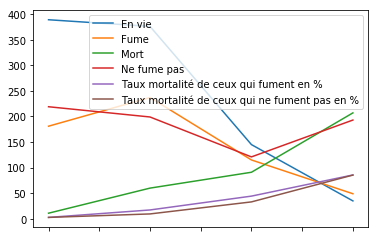

In [93]:
tab2.plot()

## Mission 3